In [57]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

keras dataset is already split into training and testing data
60000 training data points, 10000 testing data points

In [58]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [59]:
# investigating the data
print(X_train_full.shape)
print(X_train_full.dtype)


(60000, 28, 28)
uint8


60000 images, each image is of a 28x28 form grid

Each pixel is represented as a byte(0 to 255) signifying rgb code

We want to scale the inputs from 0 to 1 to prevent the matrices from "exploding" with large values later

In [60]:
X_valid, X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test/255.
# scaling dow and splitting the training data into training and validation sets
# normalizing to (0,1) range
# dont need to divide y be 255 as y labels lie from 0 to 9

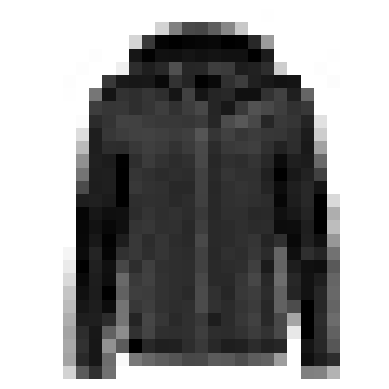

In [61]:
# plot the dataset
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [6]:
y_train[0]

np.uint8(4)

In [7]:
# each item is represented by its index in this list
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [8]:
# the first image is a coat
class_names[y_train[0]] 

'Coat'

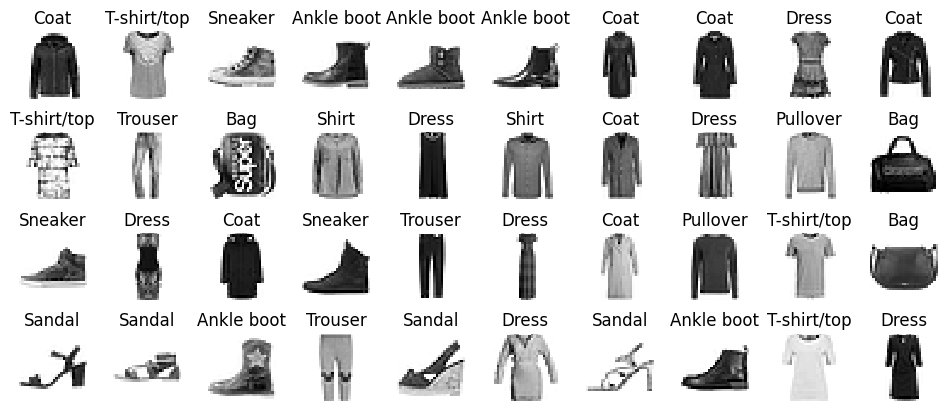

In [9]:
# smaple of images in this dataset
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap='binary', interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


ARCHITECTURE:
1. Flatten each input(28*28 pixel image) into an array of 784 values
2. 2 hidden layers with 300 and 100 units each. the output layer has 10 neurons (found after hyperparameter optimization)
3. Use ReLu activation after the first 2 hidden layers and softmax after the output layer
4. Pass into crossentopy loss function (because this is a classification problem)

In [62]:
model = keras.models.Sequential() 
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.2))  # Drop 20% of neurons
model.add(keras.layers.Dense(100, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.2))  # Drop 20% of neurons
model.add(keras.layers.Dense(10, activation="softmax"))

c:\Users\Arjun Avinash Shende\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
# set a seed to get same initial random values of weights and biases everytime
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [64]:
# summary of the architecture
model.summary()
#  example we have 784 inputs and 300 neurons in the first layer so there are 784 weights
#  on top of that we have 300 biases so total 784*300 + 300 parameters in the first layer 
# which is 235,500 as shown in the table

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

WE CAN ALSO PLOT IMAGES OF HOW THE NEURAL NETWORK ARCHITECTURE LOOKS LIKE
(MUST HAVE GRAPHVIZ INSTALLED ON YOUR COMPUTER AN ALSO THE PYDOT LIBRARY)

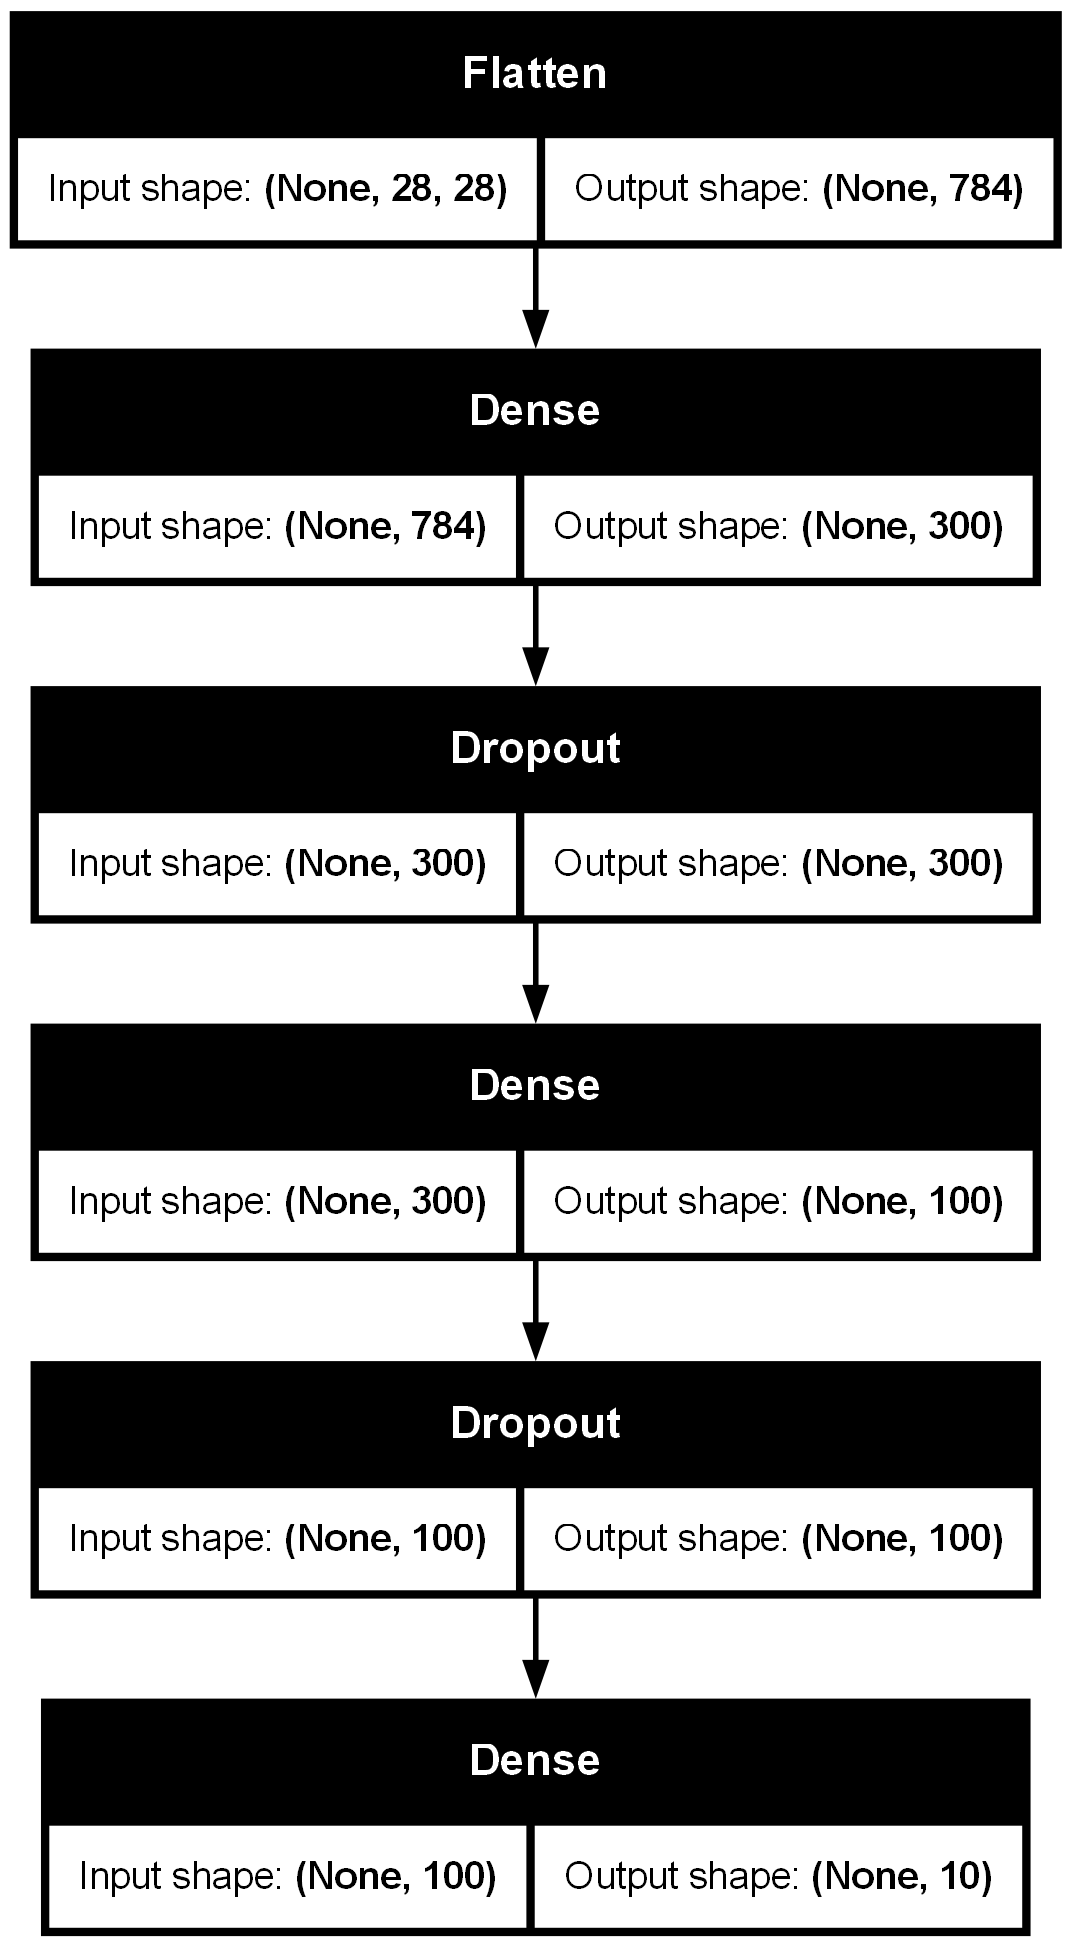

In [65]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [66]:
# some more operations
hidden1 = model.layers[1]
hidden1.name

'dense'

In [67]:
model.get_layer(hidden1.name) is hidden1

True

In [68]:
# to see the weights which keras has initialized
weights1, biases1 = hidden1.get_weights()
print(weights1)
print(weights1.shape) #shape check
print(biases1)
print(biases1.shape)


[[ 0.02100052 -0.03335829  0.00564262 ... -0.00594475 -0.05902078
   0.02558792]
 [ 0.01045274  0.02091139 -0.06557949 ... -0.0634717   0.03523511
   0.07024232]
 [-0.03471984 -0.03849272 -0.04184495 ...  0.03144198 -0.00111284
  -0.00249208]
 ...
 [-0.00503088 -0.06626403 -0.00185705 ... -0.01915209 -0.00167964
   0.07189177]
 [ 0.07428263  0.06863408 -0.0445889  ...  0.02149872 -0.04110393
   0.07011986]
 [-0.05975354 -0.01048248  0.0266673  ... -0.07379962  0.04304626
   0.03957927]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

defining the loss and optimizer

In [69]:
# my_optimizer = keras.optimizers.Adam()
## we can also use custom optimizers
# custom_adam = tf.keras.optimizers.Adam(
#     learning_rate=0.001,
#     beta_1=0.9,
#     beta_2=0.999,
#     epsilon=1e-07
# )
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=100,
    decay_rate=0.96
)
my_optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss = "sparse_categorical_crossentropy",
            optimizer = my_optimizer,
            metrics=['accuracy'])

In [31]:
# THIS IS EQUIVALENT TO:

# model.compile(loss = keras.losses.sparse_categorical_crossentropy,
#             optimizer = keras.optimizers.SGD(),
#             metrics=[keras.metrics.sparse_categorical_accuracy])

each epoch goes through the entire training data once

In [70]:
# training the neural network
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8007 - loss: 0.8310 - val_accuracy: 0.8626 - val_loss: 0.5808
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8486 - loss: 0.5783 - val_accuracy: 0.8740 - val_loss: 0.4968
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8614 - loss: 0.5127 - val_accuracy: 0.8784 - val_loss: 0.4606
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8681 - loss: 0.4788 - val_accuracy: 0.8794 - val_loss: 0.4462
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8743 - loss: 0.4625 - val_accuracy: 0.8816 - val_loss: 0.4417
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8771 - loss: 0.4526 - val_accuracy: 0.8822 - val_loss: 0.4371
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8782 - loss: 0.4489 - val_accuracy: 0.8820 - val_loss: 0.4353
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8773 - loss: 0.4490 - 

In [42]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [44]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [49]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
PLOTTING THE VALUES OF LOSS AND ACCURACY

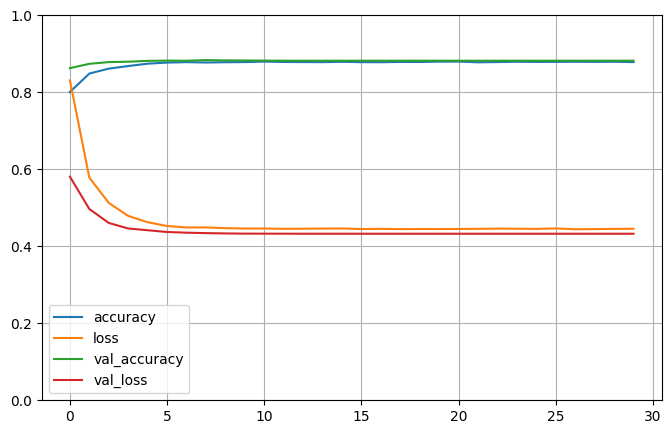

In [71]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

EVALUATE ON TEST DATA

In [72]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.8704 - loss: 0.4686


[0.46864551305770874, 0.8704000115394592]

In [73]:
X_new = X_test[:3]

THIS IS HOW THE TEST DATA LOOKS LIKE

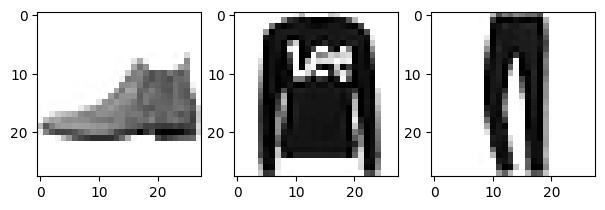

In [74]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1,3,index+1)
    plt.imshow(image, cmap="binary", interpolation="nearest")

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

WHAT MY NETWORK PREDICTS FOR THE ABOVE IMAGES:
predictions based on probability distribution outputs of the neural network

In [75]:
y_pred = np.argmax(model.predict(X_new), axis=1)
np.array(class_names)[y_pred]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

BELOW ARE THE ACTUAL CLASSIFICATIONS

In [55]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

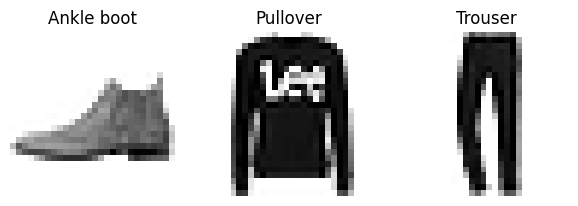

In [56]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1,3,index+1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

THIS IS EXACTLY WHAT I GOT AS OUTPUT . THIS MEANS MY NEURAL NETWORK CORRECTLY CLASSIFIES THESE 3 IMAGES